In [14]:
using Clapeyron, PyCall, CSV, Tables, IJulia, DelimitedFiles, Plots
import PyPlot; const plt = PyPlot
ternary = pyimport("ternary")

PyObject <module 'ternary' from '/home/darshan/anaconda3/envs/FEOS/lib/python3.10/site-packages/ternary/__init__.py'>

In [15]:
model1 = GERG2008(["carbon dioxide", "methane"])
# model2 = PCSAFT(["carbon dioxide", "methane"])
# model3 = EOS_CG(["carbon dioxide", "methane"])

# model1 = GERG2008(["nitrogen"])
# model2 = PCSAFT(["nitrogen"])
# model3 = EOS_CG(["nitrogen"])

models = [model1]

# for model in models
#     println("Model: ", model)
#     Tc, pc, vc = crit_pure(model1)
#     println("Critical temperature computed using model $(model): $(Tc) K")
# end

1-element Vector{MultiFluid{EmpiricAncillary, AsymmetricMixing, EmpiricDeparture}}:
 MultiFluid{EmpiricAncillary, AsymmetricMixing, EmpiricDeparture}("carbon dioxide", "methane")

In [16]:
temp            = collect(304.12:-1:280)
spin_gerg_2008  = NamedTuple{(:T, :p), Tuple{Float64, Float64}}[]
spin_eos_cg     = NamedTuple{(:T, :p), Tuple{Float64, Float64}}[]
spin_pcsaft     = NamedTuple{(:T, :p), Tuple{Float64, Float64}}[]

for T in temp
    p_spin, v_spin = spinodal_pressure(model1, T, [0.9,0.1]; phase = :l)
    push!(spin_gerg_2008, (T=T, p=p_spin))
end

# for T in temp
#     p_spin, v_spin = spinodal_pressure(model3, T, [0.9,0.1]; phase = :l)
#     push!(spin_eos_cg, (T=T, p=p_spin))
# end

# for T in temp
#     p_spin, v_spin = spinodal_pressure(model2, T, [0.9,0.1]; phase = :l)
#     push!(spin_pcsaft, (T=T, p=p_spin))
# end

In [17]:
temp            = collect(304.12:-1:220)
sat_gerg_2008  = NamedTuple{(:T, :p), Tuple{Float64, Float64}}[]
# spin_eos_cg     = NamedTuple{(:T, :p), Tuple{Float64, Float64}}[]
# spin_pcsaft     = NamedTuple{(:T, :p), Tuple{Float64, Float64}}[]

for T in temp
    p_sat = saturation_pressure(model1, T, [0.9,0.1])
    # print(p_sat[1])
    push!(sat_gerg_2008, (T=T, p=p_sat[1]))
end

# for T in temp
#     p_spin, v_spin = spinodal_pressure(model3, T, [1.0]; phase = :l)
#     push!(spin_eos_cg, (T=T, p=p_spin))
# end

# for T in temp
#     p_spin, v_spin = spinodal_pressure(model2, T, [1.0]; phase = :l)
#     push!(spin_pcsaft, (T=T, p=p_spin))
# end

ArgumentError: ArgumentError: Collection has multiple elements, must contain exactly 1 element

In [18]:
# println([s.p for s in spin])
data_gerg       = hcat([s.T for s in spin_gerg_2008], [s.p for s in spin_gerg_2008])
# data_cg         = hcat([s.T for s in spin_eos_cg], [s.p for s in spin_eos_cg])
# data_pcsaft     = hcat([s.T for s in spin_pcsaft], [s.p for s in spin_pcsaft])
# data_sat_gerg   = hcat([s.T for s in sat_gerg_2008], [s.p for s in sat_gerg_2008])

writedlm("spin_gerg_2008.dat", data_gerg, ' ')
# writedlm("spin_eos_cg.dat", data_cg, ' ')
# writedlm("spin_pcsaft.dat", data_pcsaft, ' ')
# writedlm("sat_gerg_2008.dat", data_sat_gerg, ' ')

In [19]:
for T in temp
    p_spin, v_spin = spinodal_pressure(model1, T, [0.9,0.1]; phase = :v)
    push!(spin_gerg_2008, (T=T, p=p_spin))
end

data_gerg_V       = hcat([s.T for s in spin_gerg_2008], [s.p for s in spin_gerg_2008])
writedlm("spin_gerg_2008_V.dat", data_gerg, ' ')

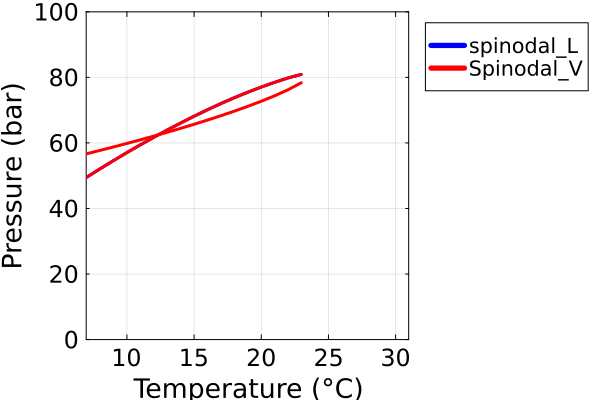

In [24]:
# Create the plot
plot(
    data_gerg[:, 1] .- 273.15, data_gerg[:, 2] ./ 1e5,
    label="spinodal_L", lw=3, color=:blue, tickfont=font(16), guidefont=font(18), legendfontsize=14, framestyle=:box
)
plot!(
    data_gerg_V[:, 1] .- 273.15, data_gerg_V[:, 2] ./ 1e5,
    label="Spinodal_V", lw=3, color=:red
)
# plot!(
#     data_pcsaft[:, 1] .- 273.15, data_pcsaft[:, 2] ./ 1e5,
#     label="PC-SAFT", lw=3, color=:green
# )
# plot!(
#     data_sat_gerg[:,1] .-273.15, data_sat_gerg[:, 2] ./1e5,
#     label="Saturation line", lw=3, color=:black
# )
xlabel!("Temperature (°C)", fontsize=18)
ylabel!("Pressure (bar)", fontsize=18)
# title!("Spinodal Pressure vs Temperature", fontsize=20)
plot!(legend=:outertopright)
plot!(xlims=(data_gerg[end,1] - 273.15, data_gerg[1,1] - 273.15), ylims=(0, 100))
# xlims!(-40, 40)
# xticks!(font=font(16))
# yticks!(font=font(16))
# framestyle!(:box)
# grid!(true)
# savefig("spinodal_pressure.png")  # Uncomment to save the figure

In [ ]:
plot(
    data_gerg[:, 1],  data_gerg[:, 2] ./ 1e5,
    label="GERG 2008 (Liq. Spinodal)", lw=3, color=:blue,
    tickfont=font(16), guidefont=font(18), legendfontsize=14,
    framestyle=:box
)
plot!(
    data_cg[:, 1], data_cg[:, 2] ./ 1e5,
    label="EOS CG (Liq. Spinodal)", lw=3, color=:red
)
plot!(
    data_pcsaft[:, 1], data_pcsaft[:, 2] ./ 1e5,
    label="PC-SAFT (Liq. Spinodal)", lw=3, color=:green
)
plot!(
    data_sat_gerg[:, 1], data_sat_gerg[:, 2] ./ 1e5,
    label="Saturation line (Binodal)", lw=3, color=:black
)

xlabel!("Temperature / [°C]", fontsize=18)
ylabel!("Pressure / [bar]", fontsize=18)
title!("computed from Clapeyron", fontsize=20)

plot!(legend=:topleft)
plot!(xlims=(data_gerg[end,1], data_gerg[1,1]), ylims=(0, 100))
xlims!(220, 310)
savefig("claypeyron.png")


In [ ]:
p_spin, v_spin = spinodal_pressure(model1, 280, [1.0]; phase = :l)